# TF-IDF Exploration Summary: Natural Language Processing with Disaster Tweets

## Introduction

This notebook conducts a comprehensive exploration of the dataset provided for the "Natural Language Processing with Disaster Tweets" Kaggle competition, with a specific focus on utilizing the Term Frequency-Inverse Document Frequency (TF-IDF) technique. The primary objective is to develop a predictive model capable of discerning whether a tweet refers to a real disaster or not. Building upon the earlier exploration of dataset structure and analysis of the target variable, this summary extends to include the TF-IDF representation of text data and modeling using SVC, Logistic Regression, and Random Forest algorithms.

## Goals of TF-IDF Exploration

1. **Exploration of Text Data using TF-IDF**:
   - Application of the TF-IDF technique to represent text data as numerical features.
   - Analysis of vocabulary size and feature matrix representation to understand the transformation of text data into TF-IDF format.
   - Identification of common words and phrases in both disaster and non-disaster tweets based on their TF-IDF scores.

2. **Modeling with TF-IDF Representation**:
   - Implementation of Support Vector Classifier (SVC), Logistic Regression, and Random Forest algorithms using TF-IDF features.
   - Hyperparameter tuning and model optimization to achieve the best performance.
   - Evaluation of model performance metrics such as F1 score, recall, precision, and accuracy.


In [1]:
from Modules_Functions import *
df      = pd.read_csv("..\\Data\\final_df.csv", encoding="latin-1")
df_test = pd.read_csv("..\\Data\\test.csv",  encoding="latin-1")

df.head()

,target,text_len,combined_text
0,1,13,deed reason earthquake may allah forgive unknown
1,1,7,forest fire near la ronge sask canada unknown
2,1,22,resident ask shelter place notify officer evac...
3,1,9,people receive wildfire evacuation order calif...
4,1,17,get send photo ruby alaska smoke wildfire pour...


####  Defining Features and Target Variables and Splitting Data

In [2]:
features = df['combined_text']
target   = df['target']

#--------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size    = 0.1, 
                                                    random_state = 42)
print(f'length of X_train: {len(X_train)}')
print(f'length of X_test : {len(X_test)}')

length of X_train: 6849
length of X_test : 762


In [3]:
X_train.head()

4619    mcfadden reportedly test hamstring thursday vi...
2858          nema warn nigerians prepare drought drought
3098    cook early get electrocute crucial psychic lol...
3751                                            fire fire
5284    family affect fatal outbreak legionnaires dise...
Name: combined_text, dtype: object

#### Generating TF-IDF Features from Training Data

In [3]:
tfidf_vectorizer     = TfidfVectorizer()
features_tfidf       = tfidf_vectorizer.fit_transform(X_train)
features_names_tfidf = tfidf_vectorizer.get_feature_names_out()
len(features_names_tfidf)

12825

#### Hyperparameter Tuning and Model Training with Support Vector Classifier (SVC) using TF-IDF Features

In [12]:
model_kernel        = SVC(random_state = 42, 
                          max_iter     = 10000)

search_space_kernel = {'C'           : [0.5, 0.6, 0.7],                
                       'kernel'      : ['linear', 'rbf', 'poly'],     
                       'class_weight': [None, 'balanced']
                       }

model_SVC_tfidf     = GridSearchCV(estimator  = model_kernel, 
                                    param_grid = search_space_kernel, 
                                    cv         = 5, 
                                    n_jobs     = -1, 
                                    scoring    = "f1")

model_SVC_tfidf.fit(features_tfidf,y_train)

test_tfidf   = tfidf_vectorizer.transform(X_test)
y_pred_SVC_tfidf = model_SVC_tfidf.predict(test_tfidf)

print('Best score:       ', model_SVC_tfidf.best_score_) 
print('Best C:           ', model_SVC_tfidf.best_estimator_.C) 
print('Best kernel:      ', model_SVC_tfidf.best_estimator_.kernel)
print('Best class_weight:', model_SVC_tfidf.best_estimator_.class_weight) 

Best score:        0.760530731677215
Best C:            0.6
Best kernel:       linear
Best class_weight: balanced


,Model,F1 Score,Recall,Precision,Accuracy
0,SVC TF-IDF,0.752322,0.721068,0.786408,0.790026


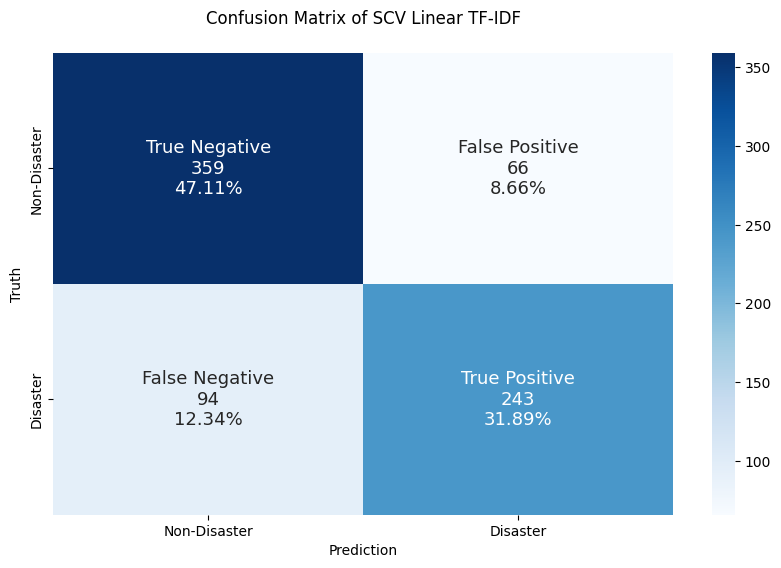

In [13]:
Confusion_Matrix_Func(y_test, y_pred_SVC_tfidf,'SCV Linear TF-IDF');
#print(classification_report(y_test, y_pred_tfidf))
f1_tfifd          = f1_score(y_test       , y_pred_SVC_tfidf)
recall_tfifd      = recall_score(y_test   , y_pred_SVC_tfidf)
precision_tfifd   = precision_score(y_test, y_pred_SVC_tfidf)
accuracy_tfifd    = accuracy_score(y_test , y_pred_SVC_tfidf)

tfifd_metrics     = pd.DataFrame({
                                'Model'    : ['SVC TF-IDF'],
                                'F1 Score' : [f1_tfifd],
                                'Recall'   : [recall_tfifd],
                                'Precision': [precision_tfifd],
                                'Accuracy' : [accuracy_tfifd]
                            })
tfifd_metrics

----------------------

#### Hyperparameter Tuning and Model Training with Logistic Regression using TF-IDF Features

In [23]:
pipeline_lr   = Pipeline([
                        ('logisticRegr', LogisticRegression(max_iter=10000, random_state=42))
                        ])

search_space  = {
                'logisticRegr__C'           : [1.7, 1.8, 1.9],
                'logisticRegr__penalty'     : ['l2','l1'], #
                'logisticRegr__solver'      : ['saga','liblinear','lbfgs','newton-cg'],
                'logisticRegr__class_weight': [None, 'balanced']
                 }

model_lr_tfidf = GridSearchCV(estimator  = pipeline_lr, 
                              param_grid = search_space, 
                              cv         = 5, 
                              n_jobs     = -1, 
                              scoring    = "f1")

model_lr_tfidf.fit(features_tfidf, y_train)
test_tfidf     = tfidf_vectorizer.transform(X_test)
pred_lr_tfidf  = model_lr_tfidf.predict(test_tfidf)

# Print best score and parameters
print('Best score:       ', model_lr_tfidf.best_score_) 
print('Best C:           ', model_lr_tfidf.best_estimator_.named_steps['logisticRegr'].C) 
print('Best penalty:     ', model_lr_tfidf.best_estimator_.named_steps['logisticRegr'].penalty)
print('Best solver:      ', model_lr_tfidf.best_estimator_.named_steps['logisticRegr'].solver)
print('Best class weight:', model_lr_tfidf.best_estimator_.named_steps['logisticRegr'].class_weight)

Best score:        0.7594109230377988
Best C:            1.8
Best penalty:      l2
Best solver:       liblinear
Best class weight: balanced


#### Evaluating Model Performance with Confusion Matrix and Metrics for Logistic Regression with TF-IDF Features

,Model,F1 Score,Recall,Precision,Accuracy
0,LR TF-IDF,0.767123,0.747774,0.7875,0.799213


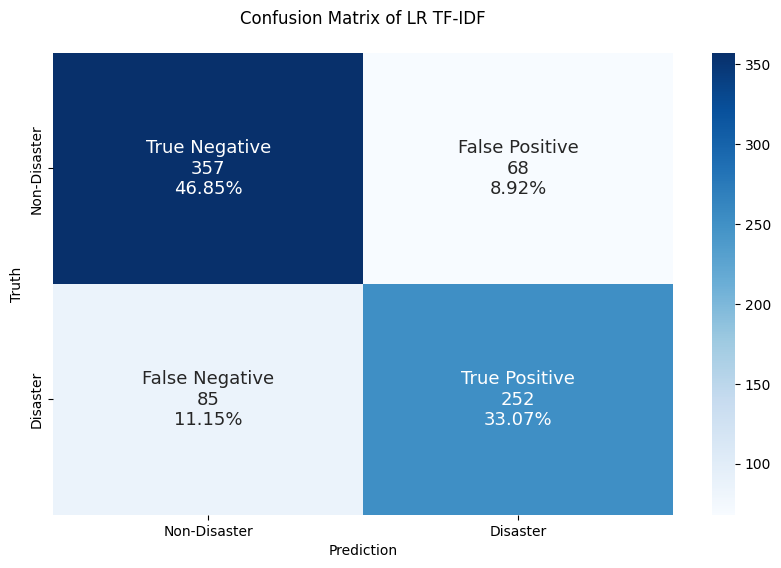

In [24]:

f1_lr_tfidf        = f1_score(y_test       ,pred_lr_tfidf)
recall_lr_tfidf    = recall_score(y_test   ,pred_lr_tfidf)
precision_lr_tfidf = precision_score(y_test,pred_lr_tfidf)
accuracy_lr_tfidf  = accuracy_score(y_test ,pred_lr_tfidf)
Confusion_Matrix_Func(y_test, pred_lr_tfidf,'LR TF-IDF');

tfidf_lr_metrics   = pd.DataFrame({
                                'Model'    : ['LR TF-IDF'],
                                'F1 Score' : [f1_lr_tfidf],
                                'Recall'   : [recall_lr_tfidf],
                                'Precision': [precision_lr_tfidf],
                                'Accuracy' : [accuracy_lr_tfidf]
                            })
tfidf_lr_metrics

-----------------------------

----------------------------------

#### Hyperparameter Tuning and Model Training with Random Forest Classifier using TF-IDF Features

In [29]:
pipeline_rf    = Pipeline([
                           ('rf', RandomForestClassifier(random_state=42))
                          ])

search_space   = {
                  'rf__n_estimators'     : [265, 270, 280],     # Example values for n_estimators
                # 'rf__max_depth'        : [None, 1],           # Example values for max_depth
                  'rf__min_samples_split': [7, 8, 9],           # Example values for min_samples_split
                  'rf__min_samples_leaf' : [2, 3, 4],           # Example values for min_samples_leaf
                  'rf__class_weight'     : ['balanced']
                  }

grid_search_rf = GridSearchCV(estimator  = pipeline_rf,
                              param_grid = search_space,
                              cv         = 3,
                              n_jobs     = -1,
                              scoring    = "f1") 

grid_search_rf.fit(features_tfidf, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced'],
                         'rf__min_samples_leaf': [2, 3, 4],
                         'rf__min_samples_split': [7, 8, 9],
                         'rf__n_estimators': [265, 270, 280]},
             scoring='f1')

#### Evaluating Model Performance with Confusion Matrix and Metrics for Random Forest Classifier with TF-IDF Features

Best score:               0.7372208911014075
Best n_estimators:        Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3, min_samples_split=8,
                                        n_estimators=270, random_state=42))])


,Model,F1 Score,Recall,Precision,Accuracy
0,LR TF-IDF,0.746988,0.735905,0.75841,0.779528


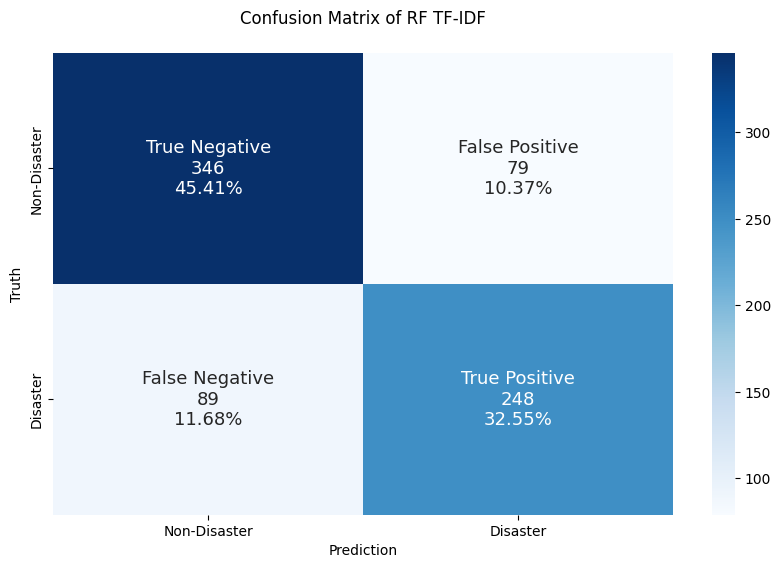

In [30]:
test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred_rf  = grid_search_rf.predict(test_tfidf)
# Print best score and parameters
print('Best score:              ', grid_search_rf.best_score_) 
print('Best n_estimators:       ', grid_search_rf.best_estimator_)

Confusion_Matrix_Func(y_test, y_pred_rf,'RF TF-IDF');
#print(classification_report(y_test, y_pred_rf))
f1_rf_tfidf        = f1_score(y_test       ,y_pred_rf)
recall_rf_tfidf    = recall_score(y_test   ,y_pred_rf)
precision_rf_tfidf = precision_score(y_test,y_pred_rf)
accuracy_rf_tfidf  = accuracy_score(y_test ,y_pred_rf)

rfidf_rf_metrics   = pd.DataFrame({
                                  'Model'    : ['LR TF-IDF'],
                                  'F1 Score' : [f1_rf_tfidf],
                                  'Recall'   : [recall_rf_tfidf],
                                  'Precision': [precision_rf_tfidf],
                                  'Accuracy' : [accuracy_rf_tfidf]
                                  })
rfidf_rf_metrics